In [2]:
pip install numpy librosa scikit-learn matplotlib seaborn soundfile


## Goal of the Project

### To build a simple Speech Emotion Detection system that:

### Extracts audio features (MFCC) from .wav files

### Trains a Machine Learning model (Logistic Regression)

### Predicts emotion from new audio

### Visualizes waveform, MFCC, confusion matrix, and class distribution


## Step 1: Import Required Libraries

In [3]:
import os
import glob
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Step 2: Define Emotion Map

In [4]:
emotion_map={
    "01":"neutral",
    "02":"calm",
    "03":"happy",
    "04":"sad",
    "05":"angry"
}

## Step 3: Visualize Audio (Waveform + MFCC)

In [5]:
def visualize_audio(file_path):
    y,sr=librosa.load(file_path)
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    librosa.display.waveshow(y,sr=sr)
    plt.title("Waveform")
    
    plt.subplot(1,2,2)
    mfccs=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)
    librosa.display.specshow(mfccs,x_axis='time')
    plt.colorbar()
    plt.title("MFCC")
    
    plt.suptitle(f"Visualization of {os.path.basename(file_path)}",fontsize=14)
    plt.tight_layout()
    plt.show()

## Step 4: Extract Features from Audio

In [6]:
def extract_features(file_path):
    y,sr=librosa.load(file_path,duration=3,offset=0.5)
    mfccs=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40)
    return np.mean(mfccs.T,axis=0)

## Step 5: Load Dataset

In [7]:
def load_data(data_path):
    X,y=[],[]
    for file in os.listdir(data_path):
        if file.endswith(".wav"):
            emotion_code=file.split("-")[2]
            emotion=emotion_map.get(emotion_code)
            if emotion:
                features=extract_features(os.path.join(data_path,file))
                X.append(features)
                y.append(emotion)
    return np.array(X),np.array(y)

## Step 6: Set Data Path and Load Data

In [9]:
data_path=r"C:\Users\CICMS\Desktop\ML\Speech Emotion\Actor_02"
X,y=load_data(data_path)

C:\Users\CICMS\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Step 7: Split Dataset for Training

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42) 

## Step 8: Train the Model

In [13]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

C:\Users\CICMS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Step 9: Evaluate Model Performance

In [14]:
y_pred=model.predict(X_test)
print("\n Classification Report:\n")
print(classification_report(y_test,y_pred))
print(f"Accuracy:{accuracy_score(y_test,y_pred):.2f}")


 Classification Report:

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         3
        calm       1.00      1.00      1.00         1
       happy       1.00      1.00      1.00         3
         sad       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Accuracy:1.00


## Step 10: Plot Confusion Matrix

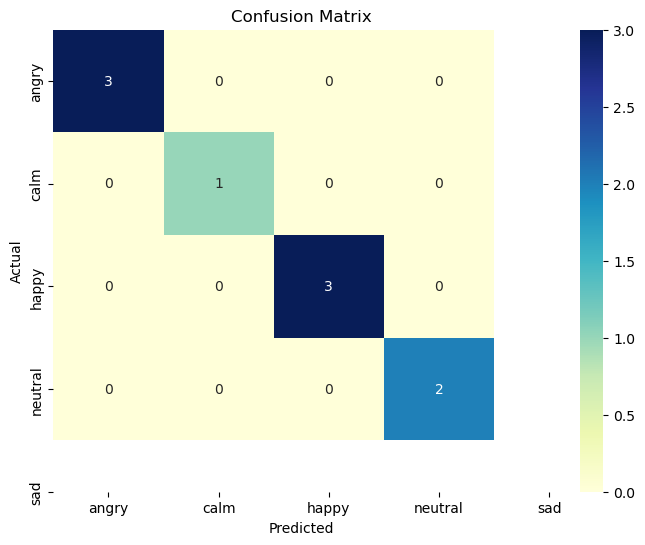

In [15]:
plt.figure(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu",
           xticklabels=model.classes_,yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 11: Show Class Distribution

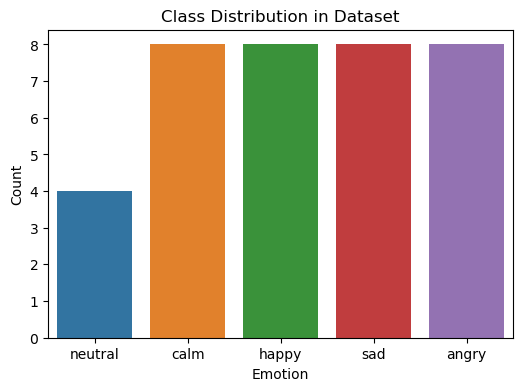

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution in Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

## step 12: Automatically Select a File and Predict

Testing on file:C:\Users\CICMS\Desktop\ML\Speech Emotion\Actor_02\03-01-01-01-01-01-02.wav
Predicted Emotion: <function predict_emotion at 0x000001BD39398F40>


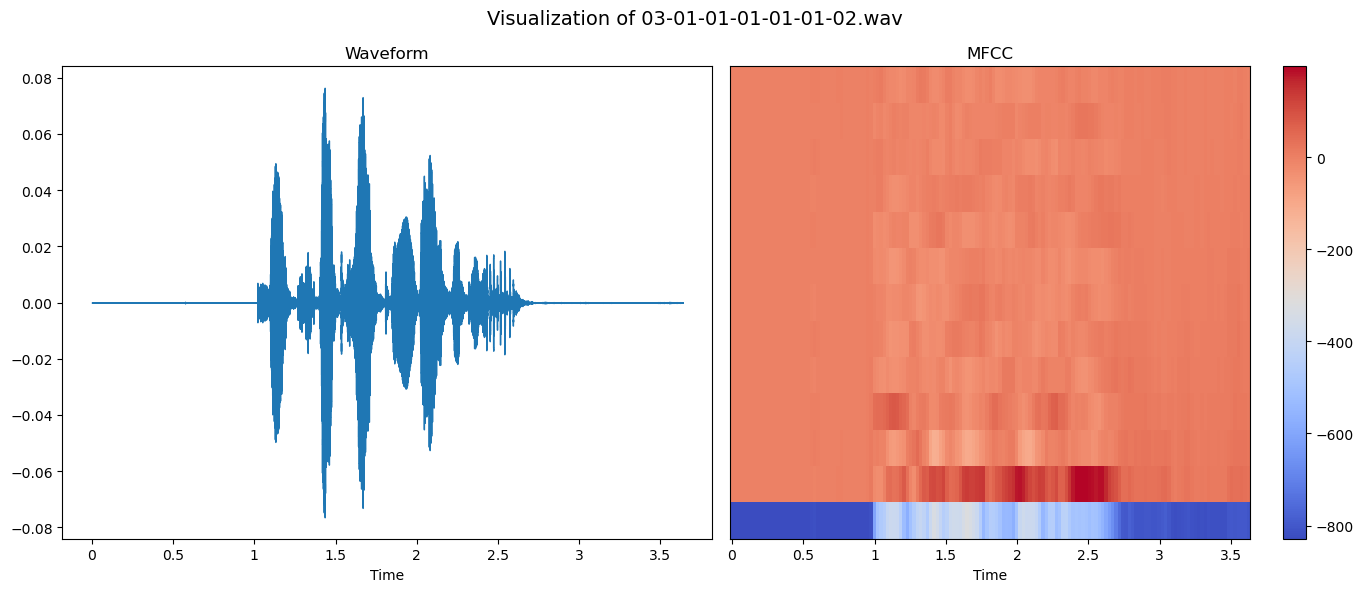

In [18]:
def predict_emotion(audio_path, model):
    features = extract_features(audio_path).reshape(1, -1)
    prediction = model.predict(features)[0]
    print(f"Predicted Emotion: {predict_emotion}")
    visualize_audio(audio_path)
    
wav_files=glob.glob(data_path+r"\*.wav")

if not wav_files:
    print("No.wav files found.")
else:
    test_audio_path=wav_files[0]
    print(f"Testing on file:{test_audio_path}")
    predict_emotion(test_audio_path,model)
    
